C:/Users/13520/Desktop/18Jul00_22-07-18_1327.lvm


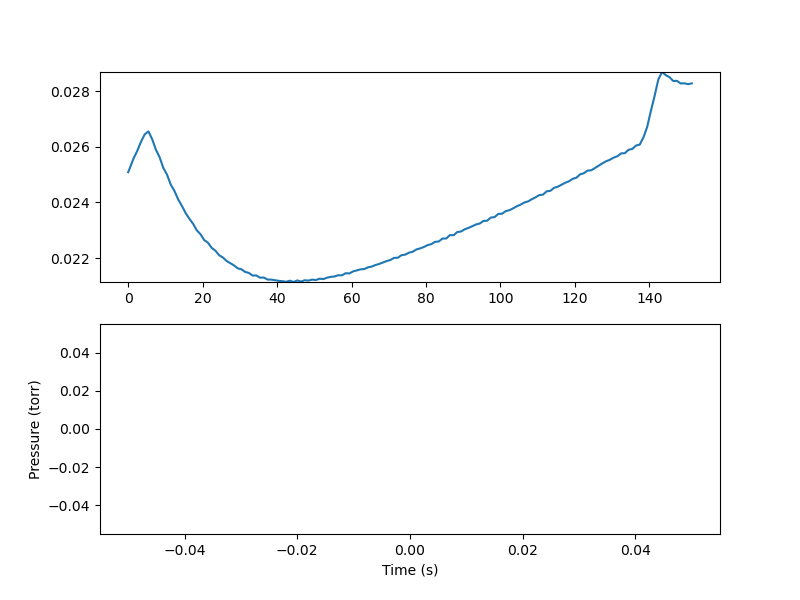

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
from tkinter import Tk
from tkinter.filedialog import askopenfilename
%matplotlib widget


Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
Tk().wm_attributes('-topmost', 1)# force GUI opened on top
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

fin=open(filename)

t=[]
p=[]

for line in fin:
    data=line.rstrip().split("	")
    t.append(data[1])
    p.append(data[2])
x=[float(x) for x in t] #define a list of floats based on list of data strings
y=[float(x) for x in p]

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

ax1.plot(x, y)
ax1.set_ylim(min(y), max(y))
plt.xlabel('Time (s)')
plt.ylabel('Pressure (torr)')


line2, = ax2.plot([], [])

def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    region_x = x[indmin:indmax]
    region_y = y[indmin:indmax]
    line2.set_data(region_x, region_y)
    ax2.set_xlim(region_x[0], region_x[-1])
    ax2.set_ylim(min(region_y), max(region_y))
    fig.canvas.draw_idle()
    # Adjusting the axis limit on plot 2 based on span selected data
span = SpanSelector(
    ax1,
    onselect,
    "horizontal",
    useblit=True,
    props=dict(alpha=0.5, facecolor="tab:blue"),
    interactive=True,
    drag_from_anywhere=True
)
# Set useblit=True on most backends for enhanced performance.


plt.show()


    

